Loading and cleaning datasets from the data_loader.py module...

Loading cleaned data for Berlin from processed directory...
Loading cleaned data for Istanbul from processed directory...
Loading cleaned data for Munich from processed directory...

Starting Exploratory Data Analysis (EDA) on cleaned datasets...



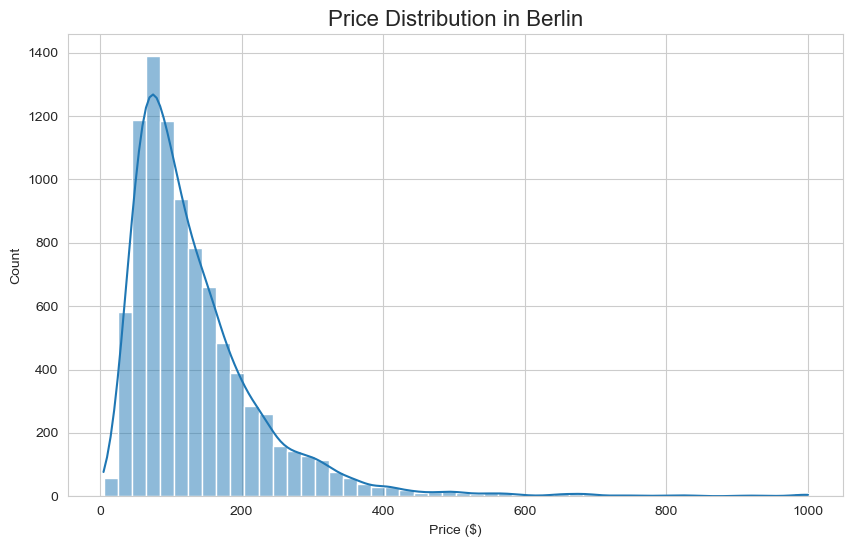

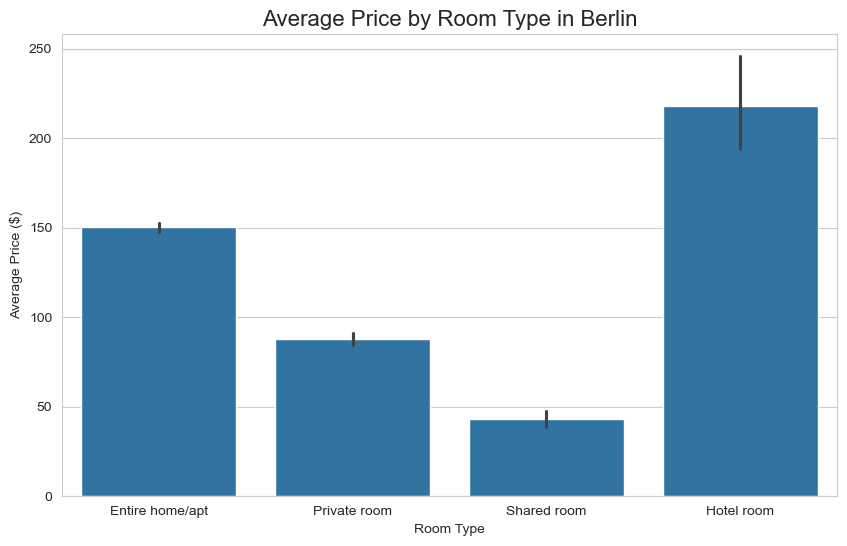

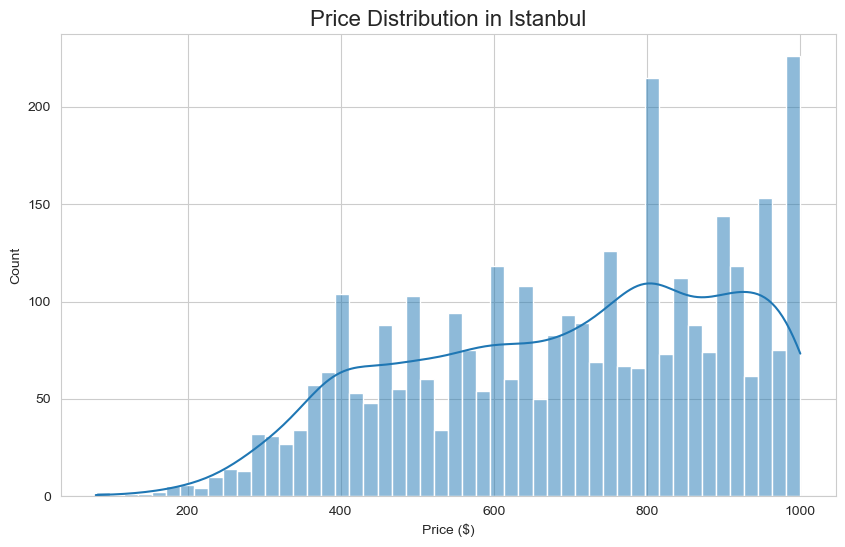

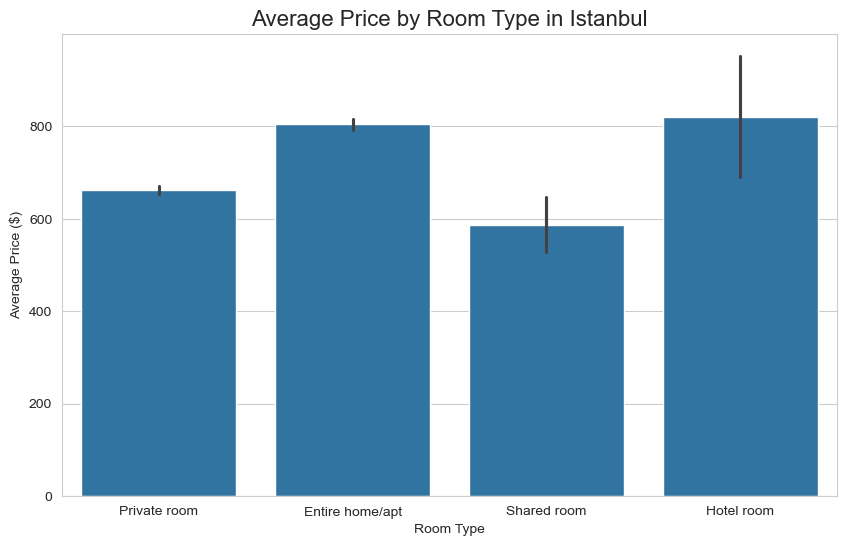

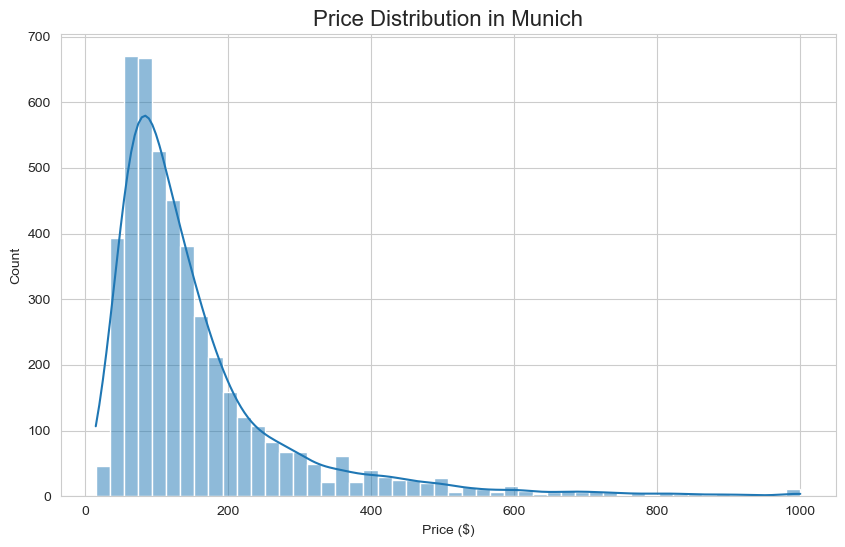

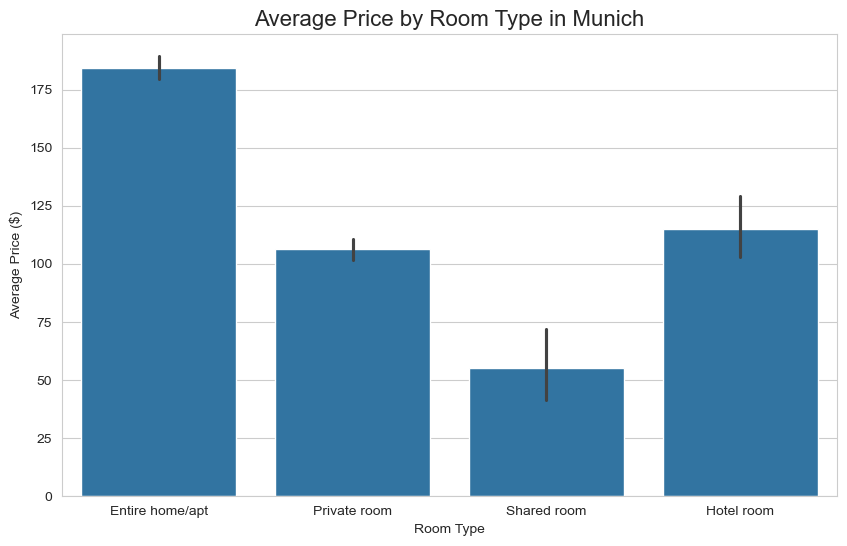

In [1]:
# notebooks/2_Data_Cleaning_and_EDA.ipynb

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add the parent directory (utils folder) to the system path to import our custom module
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import our custom data loading function
from utils.data_loader import load_and_clean_data

# Set a consistent style for plots
sns.set_style('whitegrid')

# ---
# 1. Load and Clean Datasets using the Function
# ---

print("Loading and cleaning datasets from the data_loader.py module...\n")

df_berlin = load_and_clean_data('berlin')
df_istanbul = load_and_clean_data('istanbul')
df_munich = load_and_clean_data('munich')

# Create a dictionary of dataframes for easier processing
datasets = {
    'Berlin': df_berlin,
    'Istanbul': df_istanbul,
    'Munich': df_munich
}

# ---
# 2. Exploratory Data Analysis (EDA) on the Cleaned Data
# ---

print("\nStarting Exploratory Data Analysis (EDA) on cleaned datasets...\n")

for name, df in datasets.items():
    # Price Distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=50, kde=True)
    plt.title(f'Price Distribution in {name}', fontsize=16)
    plt.xlabel('Price ($)')
    plt.ylabel('Count')
    plt.show()

    # Average Price by Room Type
    plt.figure(figsize=(10, 6))
    sns.barplot(x='room_type', y='price', data=df)
    plt.title(f'Average Price by Room Type in {name}', fontsize=16)
    plt.xlabel('Room Type')
    plt.ylabel('Average Price ($)')
    plt.show()

    # Average Price by Neighbourhood Group (if column exists)
    if 'neighbourhood_group' in df.columns:
        plt.figure(figsize=(15, 7))
        sns.boxplot(x='neighbourhood_group', y='price', data=df)
        plt.title(f'Price Distribution by Neighbourhood Group in {name}', fontsize=16)
        plt.xlabel('Neighbourhood Group')
        plt.ylabel('Price ($)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()